In [11]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import  scipy.stats as stat

XY = pd.read_table('Vect6017XY.dat', delimiter='    ', names = ['X','Y'])
big_fig = lambda x: int(np.sqrt(len(x))/3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Text(0, 0.5, 'Y')

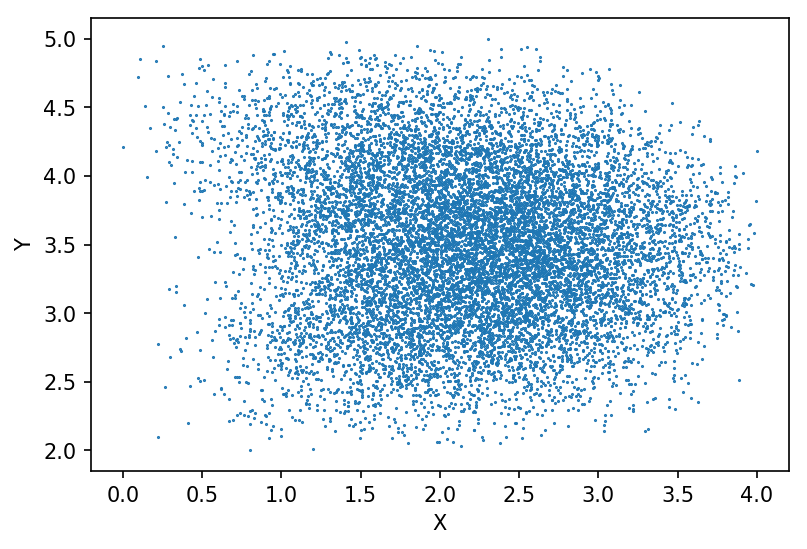

In [12]:
plt.figure(dpi = 150)
plt.plot(XY['X'],XY['Y'],'o', markersize = 0.5)
plt.xlabel('X')
plt.ylabel('Y')

Text(0.9, 0.7, 'b3=-0.03052517023664754\nb2=0.23462200494973598\nb1=-0.6078871553274099\nb4=4.01395416596215\n')

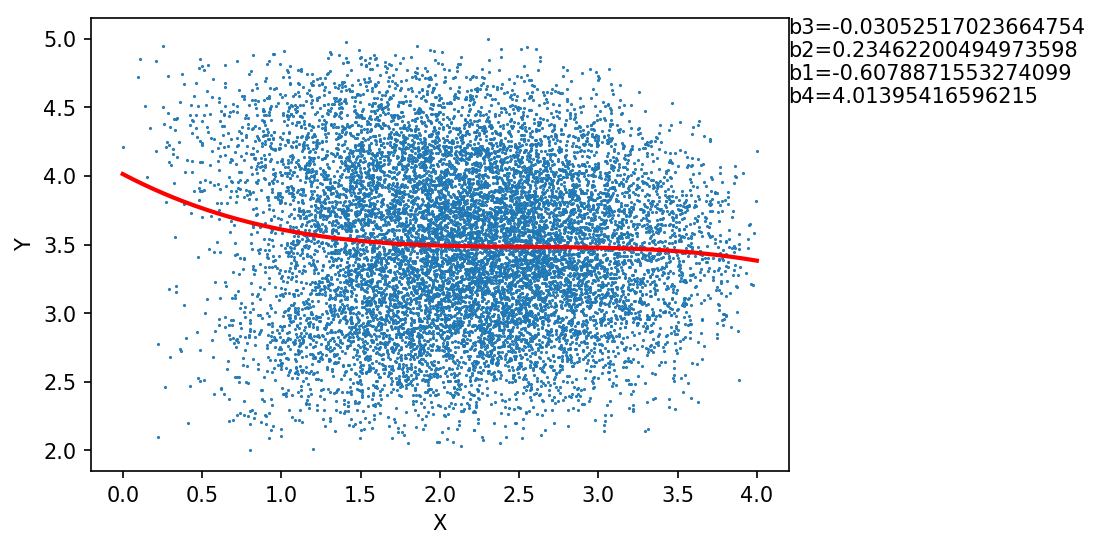

In [13]:
x = np.linspace(0,4,1000)
BB = np.polyfit(XY['X'],XY['Y'],3)
y = np.polyval(BB, x)
plt.figure(dpi = 150)
plt.plot(XY['X'],XY['Y'],'o', markersize = 0.5)
plt.plot(x,y,'r-', linewidth = 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.figtext(0.9, 0.7, "b3=%s\nb2=%s\nb1=%s\nb4=%s\n" % tuple(BB))

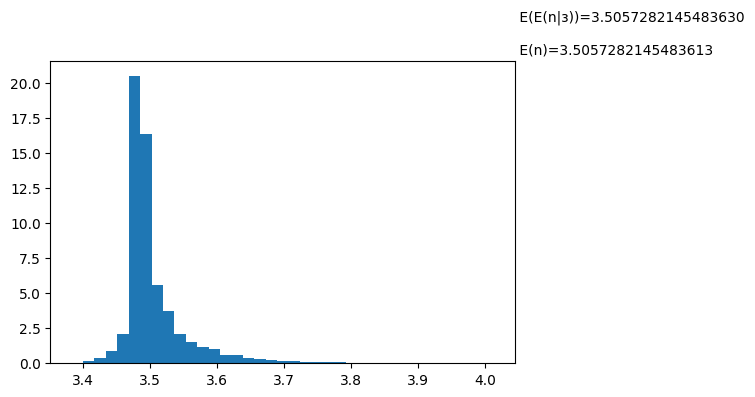

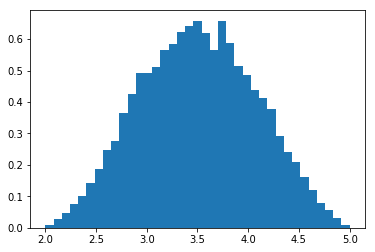

In [14]:
YY = np.polyval(BB, XY['X'])
plt.figure(dpi = 100)
plt.hist(YY, bins=big_fig(YY), normed=True)
plt.figtext(0.9,0.9," E(E(n|з))=%.16f\n\n E(n)=%.16f" % (np.mean(YY),np.mean(XY['Y'])))
plt.show()
plt.hist(XY['Y'], bins=big_fig(XY['Y']), normed=True)
plt.show()

(array([0.00089401, 0.00089401, 0.00268204, 0.00983416, 0.03486656,
        0.05274684, 0.07688523, 0.10996375, 0.14751235, 0.21545743,
        0.26820427, 0.35045359, 0.38085007, 0.44700712, 0.46041734,
        0.53462052, 0.55697088, 0.57663919, 0.63296209, 0.63564413,
        0.6401142 , 0.63206807, 0.64994836, 0.59362546, 0.55428883,
        0.49349587, 0.44164304, 0.4201867 , 0.33346731, 0.28161449,
        0.21635145, 0.14483031, 0.14125425, 0.07330917, 0.04917078,
        0.01698627, 0.0062581 ]),
 array([-1.7937672 , -1.7043547 , -1.6149422 , -1.5255297 , -1.43611719,
        -1.34670469, -1.25729219, -1.16787969, -1.07846718, -0.98905468,
        -0.89964218, -0.81022968, -0.72081718, -0.63140467, -0.54199217,
        -0.45257967, -0.36316717, -0.27375466, -0.18434216, -0.09492966,
        -0.00551716,  0.08389535,  0.17330785,  0.26272035,  0.35213285,
         0.44154536,  0.53095786,  0.62037036,  0.70978286,  0.79919537,
         0.88860787,  0.97802037,  1.06743287,  1.15

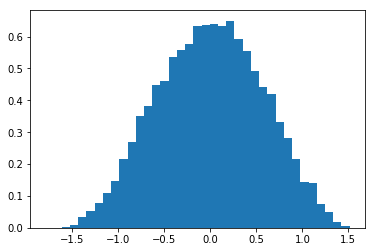

In [15]:
eta_E = XY['Y'] - YY 
plt.hist(eta_E, bins=big_fig(eta_E), normed=True)

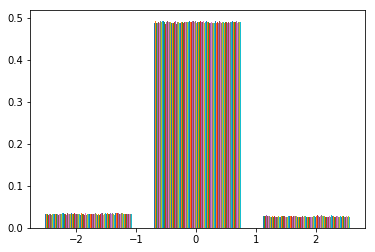

In [7]:
exp = [np.random.normal(0,np.std(eta_E),len(eta_E)) for i in  range(100)]
plt.hist(exp,big_fig(exp),normed = True)
p_val = np.array([stat.ks_2samp(eta_E, e)[1] for e in exp])

In [10]:
p_val[p_val > 0.05]

array([], dtype=float64)

Text(0.9, 0.7, 'b3=0.00016899353650141343\nb2=-0.353743\nb1=2.386009730990176\nb4=-1.7442296527019159\n')

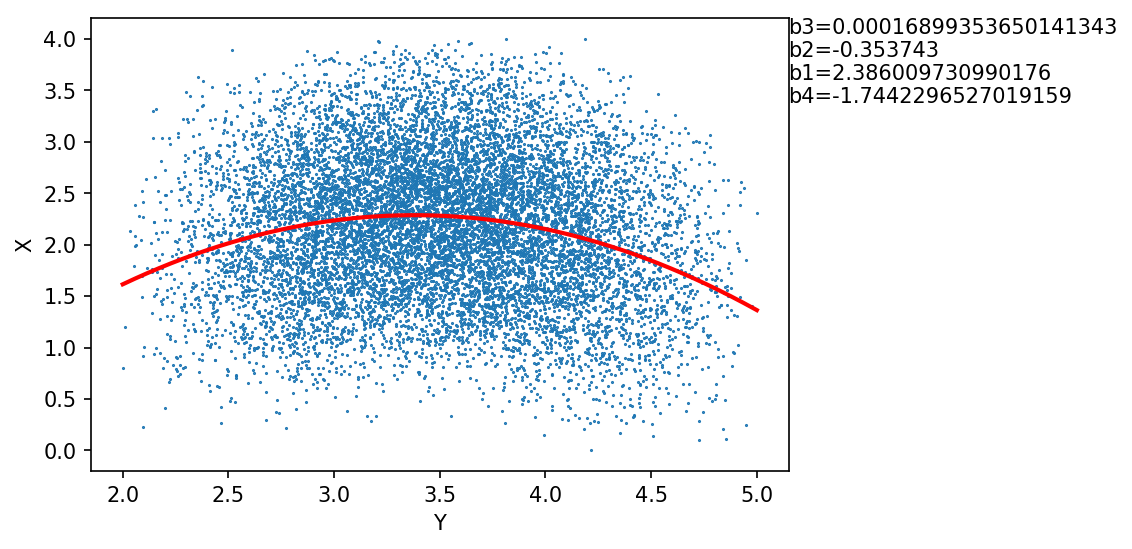

In [16]:
BB = np.polyfit(XY['Y'],XY['X'],3)
y = np.linspace(2,5,1000)
x = np.polyval(BB, y)
plt.figure(dpi = 150)
plt.plot(XY['Y'],XY['X'],'o', markersize = 0.5)
plt.plot(y,x,'r-', linewidth = 2)
plt.xlabel('Y')
plt.ylabel('X')
plt.figtext(0.9, 0.7, "b3=%s\nb2=%f\nb1=%s\nb4=%s\n" % tuple(BB))

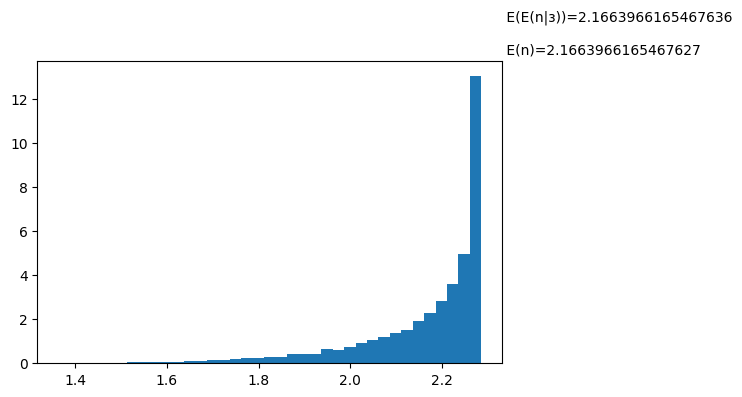

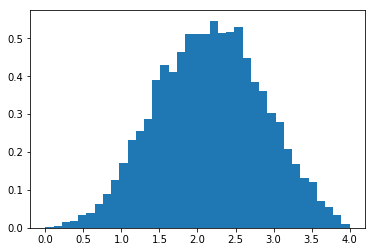

In [17]:
XX = np.polyval(BB, XY['Y'])
plt.figure(dpi = 100)
plt.hist(XX, bins=big_fig(XX), normed=True)
plt.figtext(0.9,0.9," E(E(n|з))=%.16f\n\n E(n)=%.16f" % (np.mean(XX),np.mean(XY['X'])))
plt.show()
plt.hist(XY['X'],bins=big_fig(XY['X']), normed=True)
plt.show()

(array([0.00147882, 0.00443645, 0.01478817, 0.0177458 , 0.03327338,
        0.03992806, 0.06284972, 0.09020783, 0.12717826, 0.17080336,
        0.23217426, 0.25435651, 0.2883693 , 0.38892886, 0.43033573,
        0.41111111, 0.46508793, 0.51093125, 0.51019185, 0.51241007,
        0.54642286, 0.51388889, 0.51684652, 0.52941647, 0.44882094,
        0.383753  , 0.36157074, 0.30241807, 0.28023581, 0.20851319,
        0.16858513, 0.13235412, 0.12126299, 0.07098321, 0.05471623,
        0.0347522 , 0.0088729 ]),
 array([0.        , 0.10810811, 0.21621622, 0.32432432, 0.43243243,
        0.54054054, 0.64864865, 0.75675676, 0.86486486, 0.97297297,
        1.08108108, 1.18918919, 1.2972973 , 1.40540541, 1.51351351,
        1.62162162, 1.72972973, 1.83783784, 1.94594595, 2.05405405,
        2.16216216, 2.27027027, 2.37837838, 2.48648649, 2.59459459,
        2.7027027 , 2.81081081, 2.91891892, 3.02702703, 3.13513514,
        3.24324324, 3.35135135, 3.45945946, 3.56756757, 3.67567568,
        3.7837

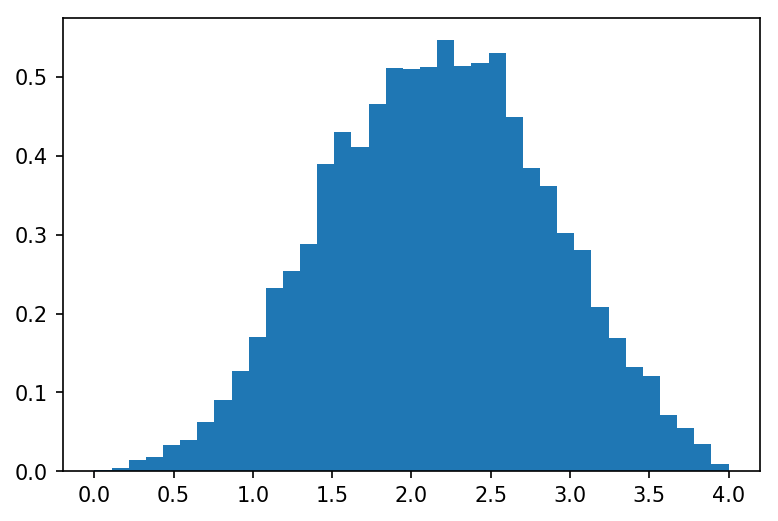

In [18]:
plt.figure(dpi = 150)
plt.hist(XY['X'], bins=big_fig(XY['X']), normed=True)

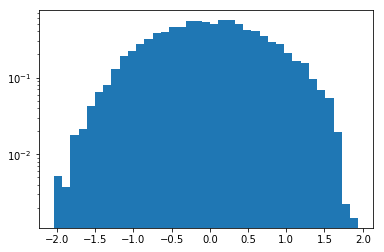

In [20]:
n_E = np.array(XY['X']) - XX
v = plt.hist(n_E, bins=big_fig(n_E), log=True,normed=True)
p = v[0]
x = v[1]
plt.show()

In [29]:
exp = [np.random.normal(0,np.std(n_E),len(n_E)) for i in  range(1000)]
p_val = np.array([stat.ks_2samp(n_E, e)[1] for e in exp])

In [31]:
len(p_val[p_val >= 0.95])

0

In [33]:
exp_l = [np.random.normal(0,np.std(n_E),len(n_E)) for i in  range(100)]
exp1 = np.random.normal(0,np.std(n_E),len(n_E))
p_val = np.array([stat.ks_2samp(exp1, e)[1] for e in exp_l])

In [189]:
stat.chisquare(f_obs=n_E,f_exp=np.random.normal(0,1,len(n_E)))

Power_divergenceResult(statistic=10376.829884855675, pvalue=1.0)

In [35]:
len(p_val[p_val >= 0.05])

98

In [24]:
n = len(n_E)
p_theor = [norm.cdf(x[i+1]) - norm.cdf(x[i]) for i in range(len(x)-1)]
sum([((len(n_E[(x[i] < n_E)&(n_E < x[i+1])]) - n*p_theor[i])**2)/(n*p_theor[i]) for i in range(len(x)-1)])

1589.6143311249466

In [25]:
len(n_E[(x[2] < n_E)&(n_E < x[3])])

24

In [26]:
n*p_theor[2]

111.86523229581033

In [89]:
p

array([ 0.01143843,  0.0630117 ,  0.22034027,  0.38128098,  0.51111719,
        0.54182034,  0.41178346,  0.24482252,  0.10916677,  0.01565259])